In [1]:
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay,f1_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
def make_df_ready(name_csv):
    df=pd.read_csv(name_csv)
    df=df.drop("Unnamed: 0",axis=1)
    df=df.drop_duplicates(subset=["Lyrics"])
    df.reset_index(drop=True,inplace=True)
    return df

def prepare_final_df(name_csv_table):
    final_df=pd.DataFrame()
    for iter in range(len(name_csv_table)):
        final_df_temp=make_df_ready(name_csv_table[iter])
        final_df = pd.concat([final_df, final_df_temp], axis=0)
    return final_df
    
def printEvaluations (clf, X_train, X_test, y_test):        
    """Returns Confusion Matrix and relevant metrics for predictions of classifiers.
    Takes classification model and split data."""
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)   
    print(f'How does model {clf} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 3)}')
    print(f'The precision of the model is: {round(precision_score(y_test, y_pred), 3)}')
    print(f'The recall of the model is: {round(recall_score(y_test, y_pred), 3)}')

    #print confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Greens')

In [3]:
name_csv_radiohead="final_lyrics_dataf.csv"
name_csv_coldplay="final_cold_lyrics_df.csv"
name_csv_table=[name_csv_radiohead,name_csv_coldplay]

In [4]:
result=prepare_final_df(name_csv_table)
result

,Artist,Link,Lyrics
0,Radiohead,https://www.lyrics.com/lyric/33903378/Radiohea...,"['Karma police', 'Arrest this man', 'He talks ..."
1,Radiohead,https://www.lyrics.com/lyric/33740754/Radiohea...,"['Dreamers', 'They never learn', 'They never l..."
2,Radiohead,https://www.lyrics.com/lyric/34465042/Radiohea...,"[""You don't wanna talk to me,"", ""You don't wan..."
3,Radiohead,https://www.lyrics.com/lyric/32911902/Radiohea...,"['Stay in the shadows', 'Cheer at the gallows'..."
4,Radiohead,https://www.lyrics.com/lyric/33446757/Radiohea...,"['Then in your life, there comes the darkness'..."
...,...,...,...
147,Coldplay,https://www.lyrics.com/lyric/24835413/Coldplay...,"['Steal my heart and hold my tongue', 'I feel ..."
148,Coldplay,https://www.lyrics.com/lyric/18658647/Coldplay...,"[""There's a wild wind blowing,"", 'Down the cor..."
149,Coldplay,https://www.lyrics.com/lyric/36007329/Coldplay...,"['Lovers keep on the road your on', 'Runners u..."
150,Coldplay,https://www.lyrics.com/lyric/19568673/Coldplay...,"['How long before I get in?', 'Before it start..."


In [5]:
result["Artist"].replace("Radiohead",0,inplace=True)
result["Artist"].replace("Coldplay",1,inplace=True)
result

,Artist,Link,Lyrics
0,0,https://www.lyrics.com/lyric/33903378/Radiohea...,"['Karma police', 'Arrest this man', 'He talks ..."
1,0,https://www.lyrics.com/lyric/33740754/Radiohea...,"['Dreamers', 'They never learn', 'They never l..."
2,0,https://www.lyrics.com/lyric/34465042/Radiohea...,"[""You don't wanna talk to me,"", ""You don't wan..."
3,0,https://www.lyrics.com/lyric/32911902/Radiohea...,"['Stay in the shadows', 'Cheer at the gallows'..."
4,0,https://www.lyrics.com/lyric/33446757/Radiohea...,"['Then in your life, there comes the darkness'..."
...,...,...,...
147,1,https://www.lyrics.com/lyric/24835413/Coldplay...,"['Steal my heart and hold my tongue', 'I feel ..."
148,1,https://www.lyrics.com/lyric/18658647/Coldplay...,"[""There's a wild wind blowing,"", 'Down the cor..."
149,1,https://www.lyrics.com/lyric/36007329/Coldplay...,"['Lovers keep on the road your on', 'Runners u..."
150,1,https://www.lyrics.com/lyric/19568673/Coldplay...,"['How long before I get in?', 'Before it start..."


In [6]:

# name_csv_radiohead="final_lyrics_dataf.csv"
# name_csv_coldplay="final_cold_lyrics_df.csv"
# name_csv_table=[name_csv_radiohead,name_csv_coldplay]
# data_radiohead=make_df_ready(name_csv_radiohead)
# data_radiohead
# data_coldplay=make_df_ready(name_csv_coldplay)
# data_coldplay
# result = pd.concat([data_radiohead, data_coldplay], axis=0)

In [7]:
X=result["Lyrics"]
y=result["Artist"]
X.shape,y.shape


((324,), (324,))

Split

#Split of Test Data

In [8]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=42)

In [9]:
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((243,), (81,), (243,), (81,))

#Split of the Data which remains of the Test Data

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_train1,y_train1,random_state=42)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182,), (61,), (182,), (61,))

## Sklearn CountVectorizer

In [12]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', token_pattern='[A-Za-z]+', ngram_range=(1,1))
X_cv = vectorizer.fit_transform(X_train)
df_bow_sklearn = pd.DataFrame(X_cv.toarray(), columns=vectorizer.get_feature_names_out())
df_bow_sklearn

,aaah,accidents,achilles,aching,admit,adventure,aeroplane,afford,age,ah,...,yeah,years,yellow,yen,yes,yesterday,yeux,young,yuppies,z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


## Model

In [14]:
text_clf=Pipeline([("vect",CountVectorizer()),("tfidf",TfidfTransformer()),("clf",RandomForestClassifier())])

#column_transformer=ColumnTransformer([
#   ("text_clf",text_clf,["Lyrics"])
#])

#column_transformer.fit(X_train)
text_clf.fit(X_train,y_train)
text_clf.score(X_train,y_train)


1.0

In [15]:
ypred=text_clf.predict(X_test)


In [16]:
accuracy_score(y_test, ypred)

0.9180327868852459

In [17]:
ypred1=text_clf.predict(X_test1)

In [18]:
accuracy_score(y_test1, ypred1)

0.8765432098765432

How does model Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())]) score:
The accuracy of the model is: 0.918
The precision of the model is: 0.962
The recall of the model is: 0.862


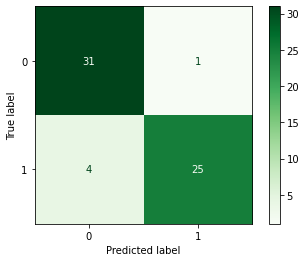

In [19]:
#y_test=y_test.to_numpy()
printEvaluations(text_clf,X_train,X_test,y_test)

How does model Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())]) score:
The accuracy of the model is: 0.877
The precision of the model is: 0.912
The recall of the model is: 0.816


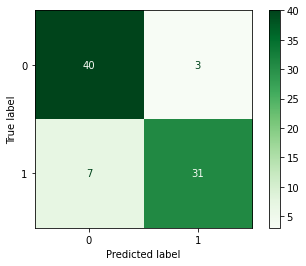

In [20]:
printEvaluations(text_clf,X_train,X_test1,y_test1)

## Grid Search